# Exploratory Data Analysis of Top-250 Movies IMDb

-----

### In this lab i would like to analize [Top 250 Movies](https://www.imdb.com/chart/top/?ref_=nv_mv_250) by IMDb to find correlation between the period of the films, rating, director and actors.

------

In [1]:
import time

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options

## Collection Data

In [2]:
#Opening IMDb website with information about Top-250 movies

options = Options()
options.add_argument('--headless')

driver = webdriver.Chrome("C:\webdrivers\chromedriver.exe" , options= options)
driver.get('https://www.imdb.com/chart/top/?ref_=nv_mv_250')
driver.maximize_window()
time.sleep(1)

C:\Users\nikit\AppData\Local\Temp\ipykernel_18956\1294229096.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:\webdrivers\chromedriver.exe" , options= options)


In [3]:
# Receiving data with the XPATH method and adding this data into the list

# Name

names_path = '//td[@class = "titleColumn"]/a'
names = [name.text for name in driver.find_elements(By.XPATH , names_path)]

# Year

year_path = '//span[@class = "secondaryInfo"]'
years = [year.text for year in driver.find_elements(By.XPATH , year_path)]

# Director

director_path = '//td[@class = "titleColumn"]/a'
directors = [director.get_attribute('title') for director in driver.find_elements(By.XPATH , director_path)]

# Rating

rating_path = '//td[@class = "ratingColumn imdbRating"]'
ratings = [rate.text for rate in driver.find_elements(By.XPATH , rating_path)]

In [4]:
# Creating dictionary with all data about Top-250 Movies

dict = {'Title' : names , 'Year' : years , 'Director' : directors , 'Rating' : ratings}

In [5]:
driver.close()

In [6]:
# Creating Pandas Dataframe from our dictionary

df = pd.DataFrame.from_dict(dict)
df.index = df.index + 1
df

,Title,Year,Director,Rating
1,The Shawshank Redemption,(1994),"Frank Darabont (dir.), Tim Robbins, Morgan Fre...","9,2"
2,The Godfather,(1972),"Francis Ford Coppola (dir.), Marlon Brando, Al...","9,2"
3,The Dark Knight,(2008),"Christopher Nolan (dir.), Christian Bale, Heat...","9,0"
4,The Godfather Part II,(1974),"Francis Ford Coppola (dir.), Al Pacino, Robert...","9,0"
5,12 Angry Men,(1957),"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb","9,0"
...,...,...,...,...
246,The Help,(2011),"Tate Taylor (dir.), Viola Davis, Emma Stone","8,0"
247,Dersu Uzala,(1975),"Akira Kurosawa (dir.), Maksim Munzuk, Yuriy So...","8,0"
248,Aladdin,(1992),"Ron Clements (dir.), Scott Weinger, Robin Will...","8,0"
249,Gandhi,(1982),"Richard Attenborough (dir.), Ben Kingsley, Joh...","8,0"


## Data Cleaning

In [7]:
# Cleaning the data

df['Year'] = df['Year'].apply(lambda x: x.replace('(' , '')).apply(lambda x: x.replace(')' , ''))
df['Year'] = df['Year'].astype(int)

df['Rating'] = df['Rating'].apply(lambda x : x.replace(',' , '.'))
df['Rating'] = df['Rating'].astype(float)

# Creating Actors column

df['Actors'] = df['Director']

df['Director'] = df['Director'].str.split(',').str[0]
df['Director'] = df['Director'].apply(lambda x: x.replace( '(dir.)' , ''))

df['Actors'] = df['Actors'].str.extract('\(dir\.\)\s*(.*)', expand=False).str[2:]
df.insert(3, 'Actors', df.pop('Actors'))

In [8]:
df.dtypes

Title        object
Year          int32
Director     object
Actors       object
Rating      float64
dtype: object

In [9]:
df.head()

,Title,Year,Director,Actors,Rating
1,The Shawshank Redemption,1994,Frank Darabont,"Tim Robbins, Morgan Freeman",9.2
2,The Godfather,1972,Francis Ford Coppola,"Marlon Brando, Al Pacino",9.2
3,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger",9.0
4,The Godfather Part II,1974,Francis Ford Coppola,"Al Pacino, Robert De Niro",9.0
5,12 Angry Men,1957,Sidney Lumet,"Henry Fonda, Lee J. Cobb",9.0


## Data Exploration

In [10]:
df.describe()

,Year,Rating
count,250.000000,250.000000
mean,1986.360000,8.250400
std,25.125356,0.235972
min,1921.000000,8.000000
25%,1966.250000,8.100000
50%,1994.000000,8.200000
75%,2006.000000,8.400000
max,2022.000000,9.200000


In [11]:
df.corr()

,Year,Rating
Year,1.000000,0.051117
Rating,0.051117,1.000000


### We can see that there is a slight positive  correlation between rating and year

-----

# Data Visualization and Analysis

# Best Decade

In [12]:
df['Decade'] = (df['Year'] // 10) * 10

In [13]:
decade_ratings = df.groupby('Decade').mean()['Rating']

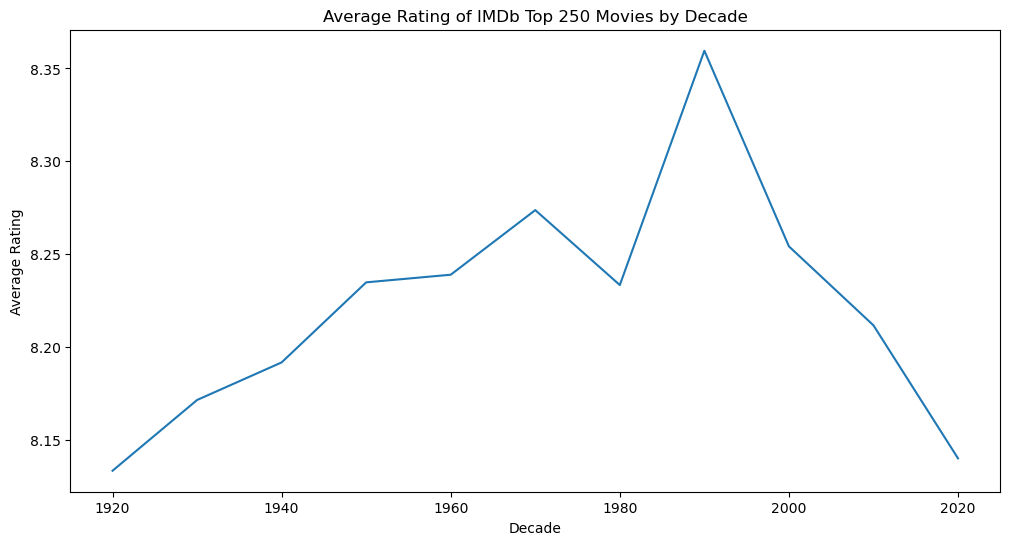

In [14]:
decade_ratings.plot(kind='line', figsize=(12,6))

plt.xlabel('Decade')
plt.ylabel('Average Rating')
plt.title('Average Rating of IMDb Top 250 Movies by Decade')

plt.show()

### Based on this chart, we can see that the highest average ratings are for films made in the 90s. We can rely on this data when creating new films.  In addition, we can use this information to study the characteristics of films from those decades and try to replicate them in our own filmmaking efforts.

-------

# Best Directors

In [15]:
director_counts = df['Director'].value_counts()

df_directors = pd.DataFrame({'Director': director_counts.index, 'Count': director_counts.values})

df_directors = df_directors.sort_values(by='Count', ascending=False)

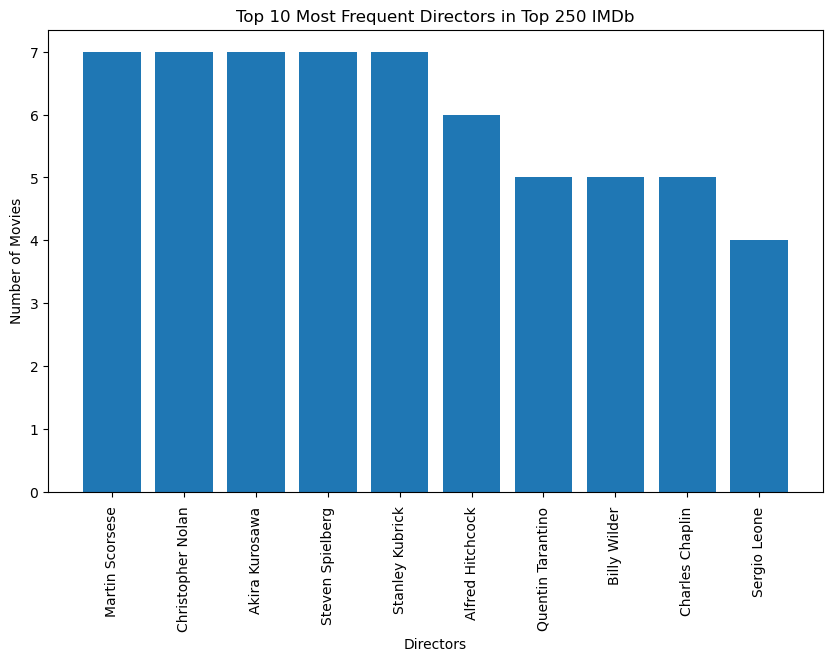

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(df_directors['Director'][:10], df_directors['Count'][:10])


plt.title("Top 10 Most Frequent Directors in Top 250 IMDb")
plt.xlabel("Directors")
plt.xticks(rotation=90)
plt.ylabel("Number of Movies")


plt.show()

###  The most frequent directors in Top-250 are Martin Scorsese, Christopher Nolan, Akira Kurosawa, Steven Spielberg and Stanley Kubtick. Each has 7 movies in the list.

------

# Best Actors

In [17]:
df['Actor_1'] = df['Actors'].str.split(',').str[0]

df['Actor_2'] = df['Actors'].str.split(',').str[1]

actors = pd.concat([df['Actor_1'], df['Actor_2']])

In [20]:
actor_counts = actors.value_counts()
actor_counts = actor_counts.sort_values(ascending= False)
print(actor_counts[:10])

Robert De Niro       6
Leonardo DiCaprio    5
Charles Chaplin      5
Tom Hanks            5
James Stewart        4
Toshirô Mifune       4
Clint Eastwood       4
Christian Bale       4
 Robert De Niro      3
Mark Hamill          3
dtype: int64


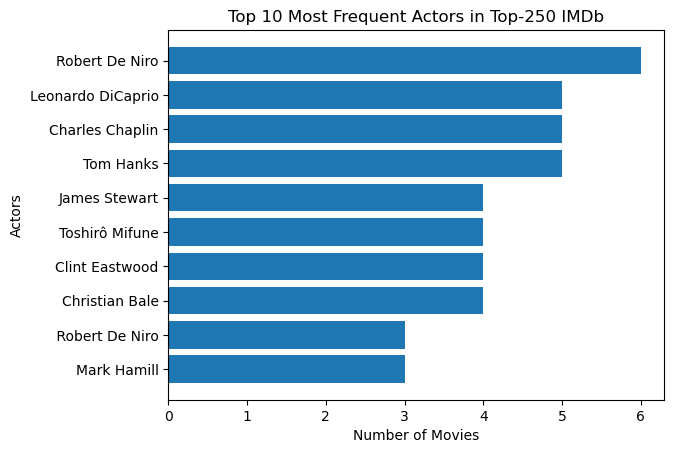

In [21]:
top_actors = actor_counts[:10]
top_actors = top_actors.iloc[::-1]

# Create a horizontal bar plot of the top 10 most frequent actors
plt.barh(top_actors.index, top_actors.values)
plt.title('Top 10 Most Frequent Actors in Top-250 IMDb')
plt.xlabel('Number of Movies')
plt.ylabel('Actors')
plt.show()

###  The most frequent actor in Top-250 IMDb is Robert De Niro who was one of the main characters in 6 films from the list.

----

# Thank you for watching!

-----